## Data
https://www.kaggle.com/c/bike-sharing-demand/data

- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- **holiday** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather** -   
    1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv', parse_dates=['datetime'])
test = pd.read_csv('../input/test.csv', parse_dates=['datetime'])

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [8]:
train.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8355,2012-07-09 12:00:00,3,0,1,2,30.34,34.090,58,8.9981,61,205,266
4063,2011-10-01 08:00:00,4,0,0,2,16.40,20.455,76,22.0028,9,58,67
4545,2011-11-02 11:00:00,4,0,1,1,17.22,21.210,71,8.9981,27,117,144
9325,2012-09-11 22:00:00,3,0,1,1,22.96,26.515,64,7.0015,27,189,216
3318,2011-08-08 04:00:00,3,0,1,1,27.06,29.545,89,7.0015,2,8,10
9540,2012-10-01 21:00:00,4,0,1,2,22.14,25.760,73,8.9981,13,205,218
6339,2012-03-01 09:00:00,1,0,1,1,18.86,22.725,77,16.9979,5,281,286
1342,2011-04-01 19:00:00,2,0,1,1,13.94,15.150,49,22.0028,16,120,136
5683,2012-01-11 23:00:00,1,0,1,3,13.94,15.910,87,15.0013,0,9,9
3998,2011-09-17 15:00:00,3,0,0,2,21.32,25.000,72,12.9980,148,206,354


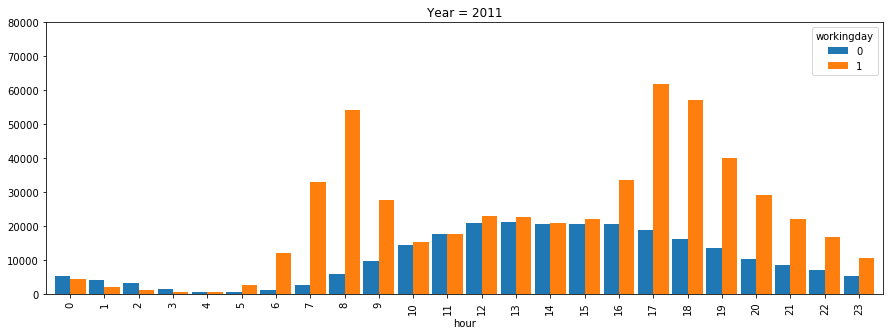

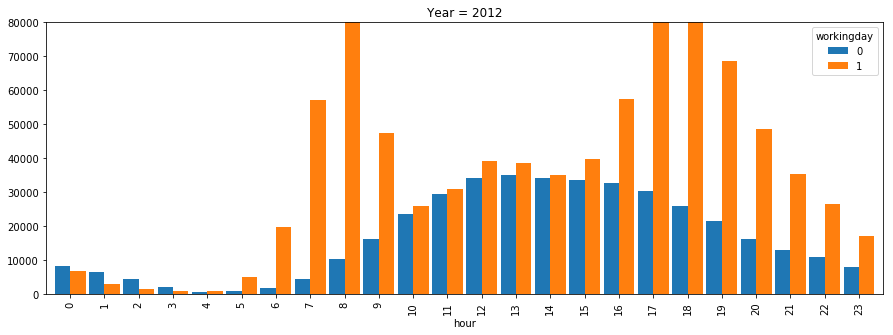

In [5]:
def plot_by_hour(data, year=None, agg='sum'):
    dd = data.copy()
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))


plot_by_hour(train, year=2011);
plot_by_hour(train, year=2012);

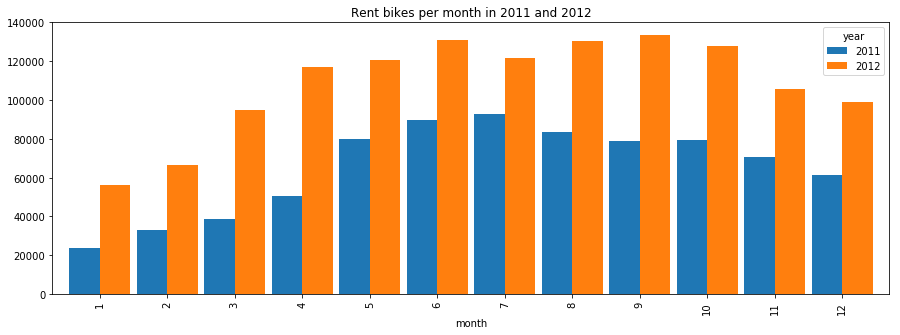

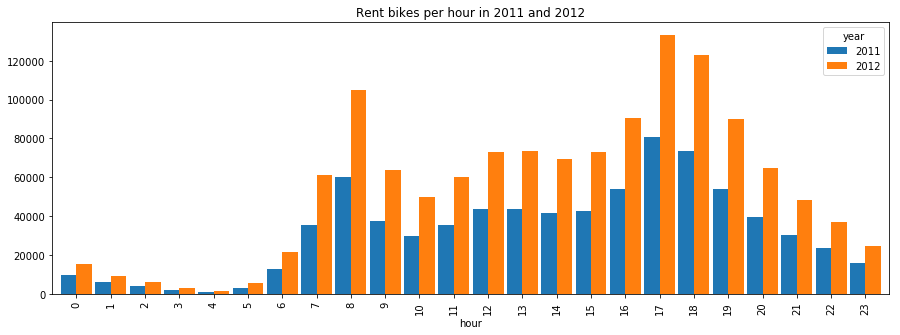

In [6]:
def plot_by_year(agg_attr, title):
    dd = train.copy()
    dd['year'] = train.datetime.dt.year
    dd['month'] = train.datetime.dt.month
    dd['hour'] = train.datetime.dt.hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)


plot_by_year('month', "Rent bikes per month in 2011 and 2012");
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012");

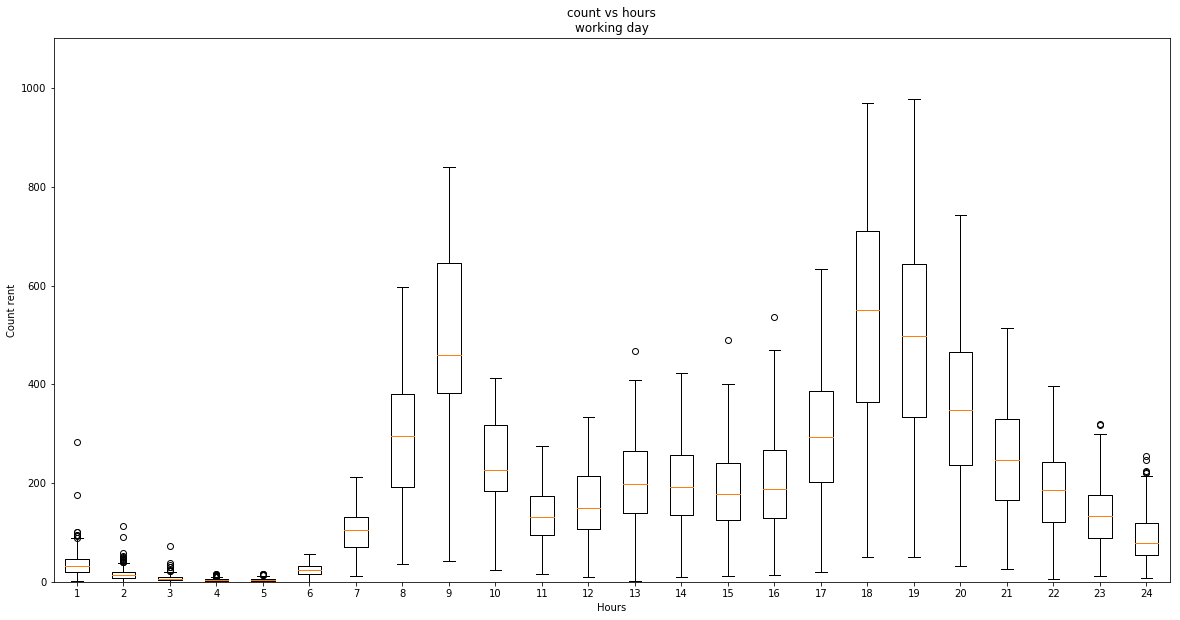

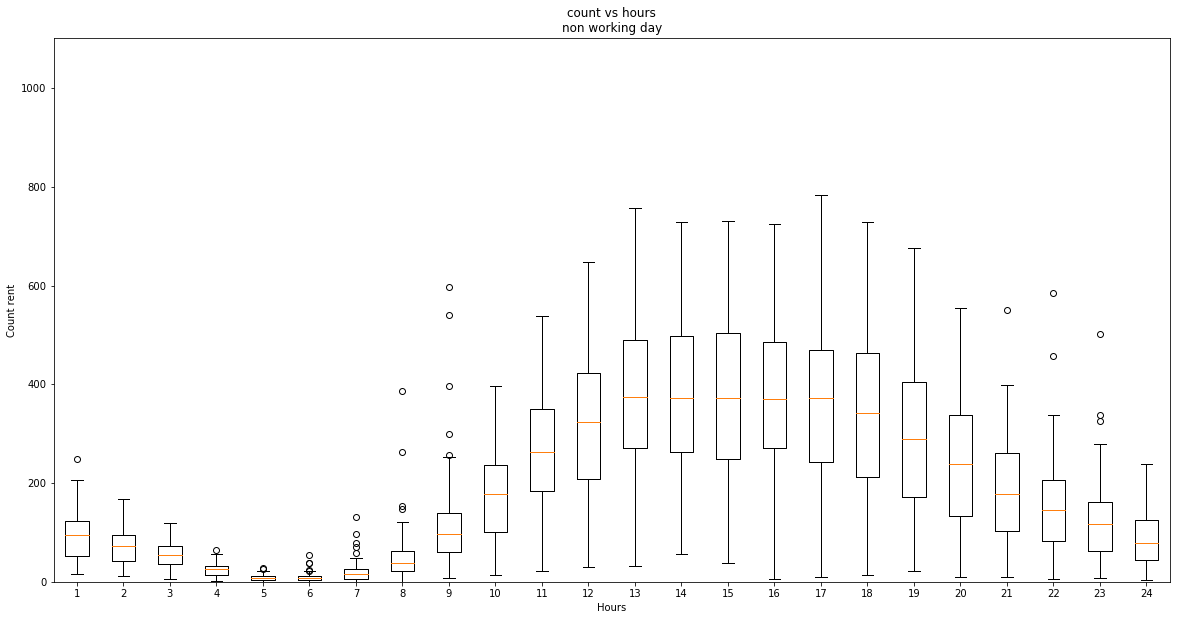

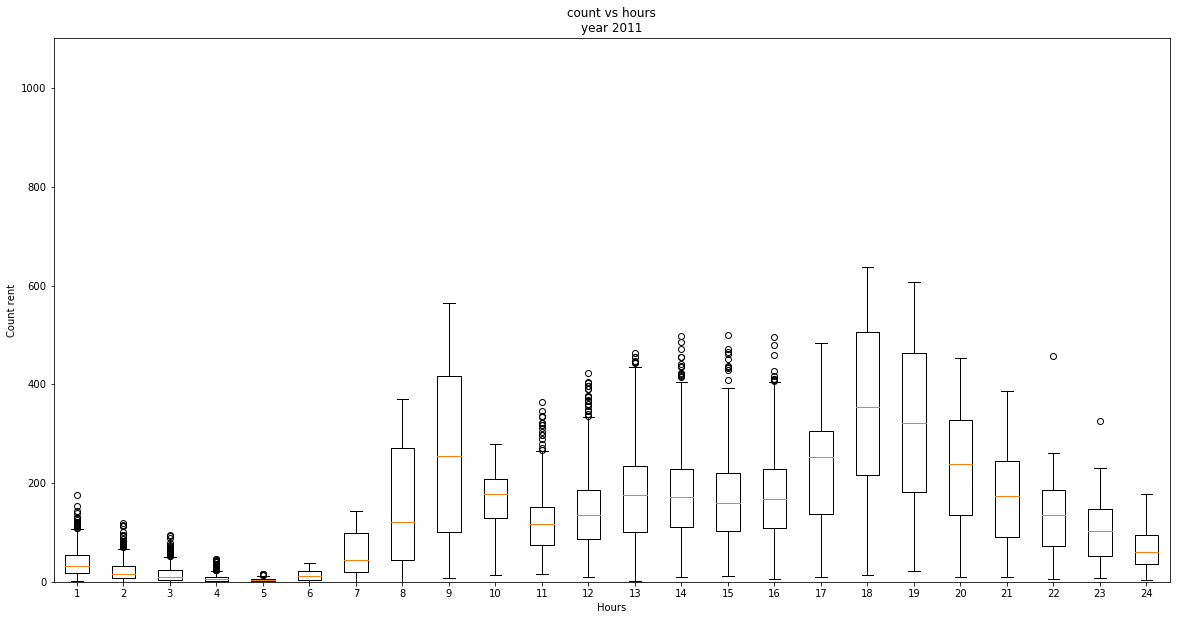

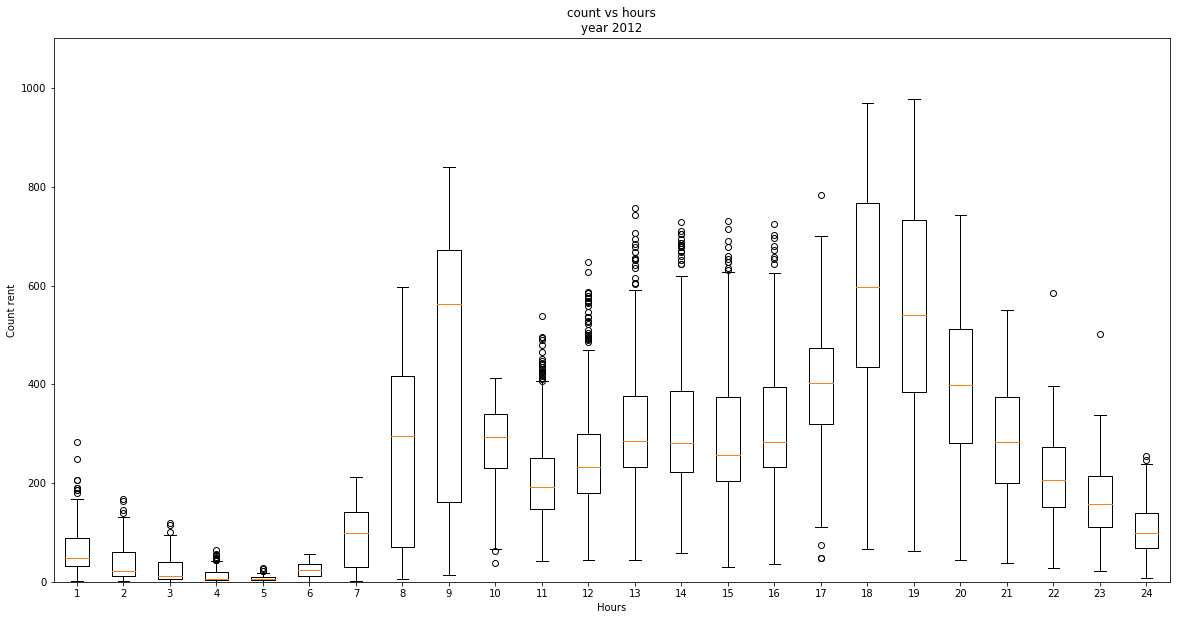

In [7]:
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
    

plot_hours( train[train.workingday == 1], 'working day')
plot_hours( train[train.workingday == 0], 'non working day')

plot_hours( train[train.datetime.dt.year == 2011], 'year 2011');
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012');